<a href="https://colab.research.google.com/github/zizilnam/Mini_Project_NLP_Pair_Sentence_Kaggle/blob/main/Quora_EDA_Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

## Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import gc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pal = sns.color_palette()

In [ ]:
%cd /content/drive/MyDrive/NLP-Project/quora-question-pairs

/content/drive/MyDrive/NLP-Project/quora-question-pairs


In [ ]:
train_df = pd.read_csv("train.csv")
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
test_1_df = pd.read_csv("test.csv")
test_1_df.shape

(2345796, 3)

In [ ]:
test_1_df.isna().sum()

test_id      0
question1    2
question2    4
dtype: int64

In [ ]:
test_2_df = pd.read_csv("test (2).csv")
test_2_df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3563475, 3)

In [ ]:
test_2_df.isna().sum()

test_id      0
question1    4
question2    6
dtype: int64

In [ ]:
test_2_df.test_id.value_counts().to_frame()

,test_id
1303969,2
1630404,2
1630384,2
1630385,2
1630386,2
...,...
1101606,1
1101607,1
1101608,1
1101609,1


In [ ]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


id : 행 번호를 말하는 듯합니다.
qid1, qid2 : 각 질문의 id를 말합니다.
question1, question2 : 실제 질문들
is_duplicate : 우리가 예측하려고하는 레이블입니다.

In [ ]:
print("Total number of question pairs for training: {}".format(len(train_df)))
print("Duplicate pairs: {}%".format(round(train_df['is_duplicate'].mean()*100, 2)))
qids = pd.Series(train_df['qid1'].tolist() + train_df['qid2'].tolist())
print("Total number of questions in the training data: {}".format(len(np.unique(qids))))
print("Number of questions that appear multiple times: {}".format(np.sum(qids.value_counts()>1)))


Total number of question pairs for training: 404290
Duplicate pairs: 36.92%
Total number of questions in the training data: 537933
Number of questions that appear multiple times: 111780


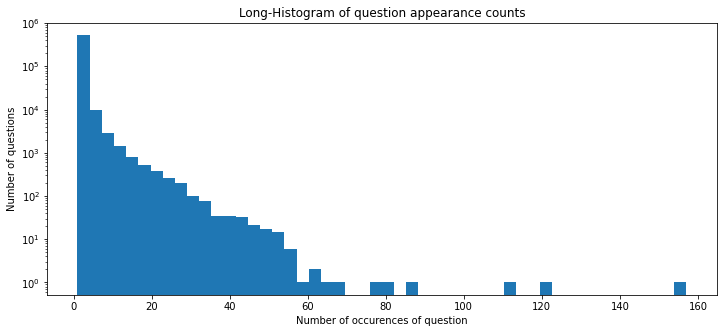

In [ ]:
plt.figure(figsize=(12, 5))
plt.hist(qids.value_counts(), bins=50)
plt.yscale('log', nonposy='clip')
plt.title('Long-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')
plt.show()

한 번만 사용된 질문이 제일 많긴 한데 여러번 사용된 질문의 수가 굉장히 많다. 심지어 157번 까지 반복되어 사용된 질문도 있다.


In [ ]:
qids.value_counts().to_frame()

,0
2559,157
30782,120
4044,111
2561,88
14376,79
...,...
75109,1
81254,1
85352,1
83305,1


In [ ]:
test_df = test_1_df

## Characer Analysis

In [ ]:
train_qs = pd.Series(train_df['question1'].tolist() + train_df['question2'].tolist()).astype(str)
test_qs = pd.Series(test_df['question1'].tolist() + test_df['question2'].tolist()).astype(str)

dist_train = train_qs.apply(len)
dist_test = test_qs.apply(len)

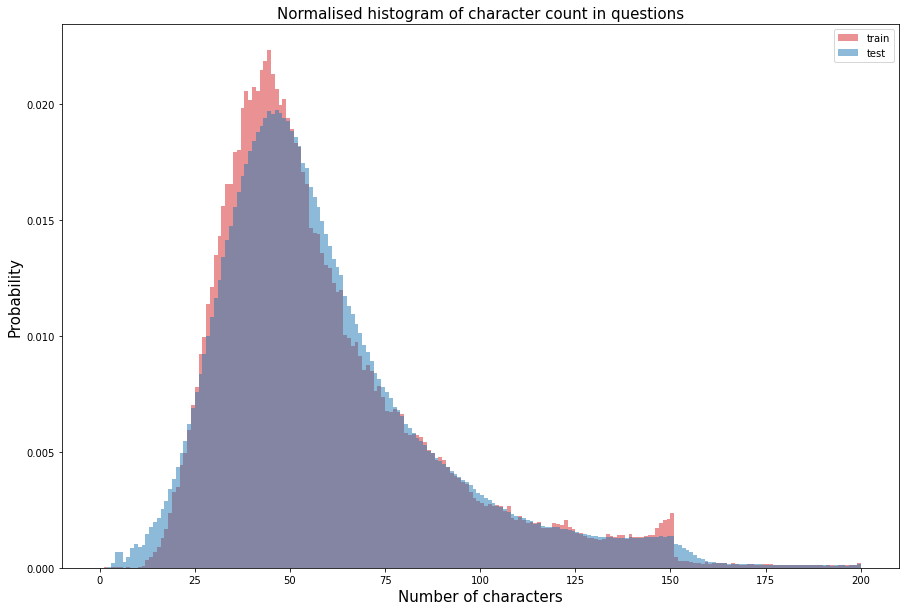

mean-train 59.82 std-train 31.96 mean-test 60.07 std-test31.62 max-train 1169.00 max-test 1176.00


In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(dist_train, bins=200, range=[0, 200], color=pal[3],density=True, alpha=0.5 ,label='train')
plt.hist(dist_test, bins=200, range=[0,200], color=pal[0],density=True, alpha=0.5, label='test')
plt.title('Normalised histogram of character count in questions', fontdict={'fontsize':15})
plt.legend()
plt.xlabel("Number of characters", fontdict={'fontsize':15})
plt.ylabel("Probability", fontdict={'fontsize':15})
plt.show()

print('mean-train {:.2f} std-train {:.2f} mean-test {:.2f} std-test{:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(),
                                                                                                                   dist_train.std(),
                                                                                                                   dist_test.mean(),
                                                                                                                   dist_test.std(),
                                                                                                                   dist_train.max(),
                                                                                                                   dist_test.max()))

50글자 내외의 문장이 제일 흔한 걸로 나온다. 이 그래프에서 가장 눈에 띄는 점은 150글자가 넘는 지점에서 절벽이 생기는 것이다. 그리고 최대글자는 1160자가 넘는데 그래프에는 200자까지만 표현되어있다. 아마도 200자가 넘는 문자은 희귀한가보다.

## Word Analysis

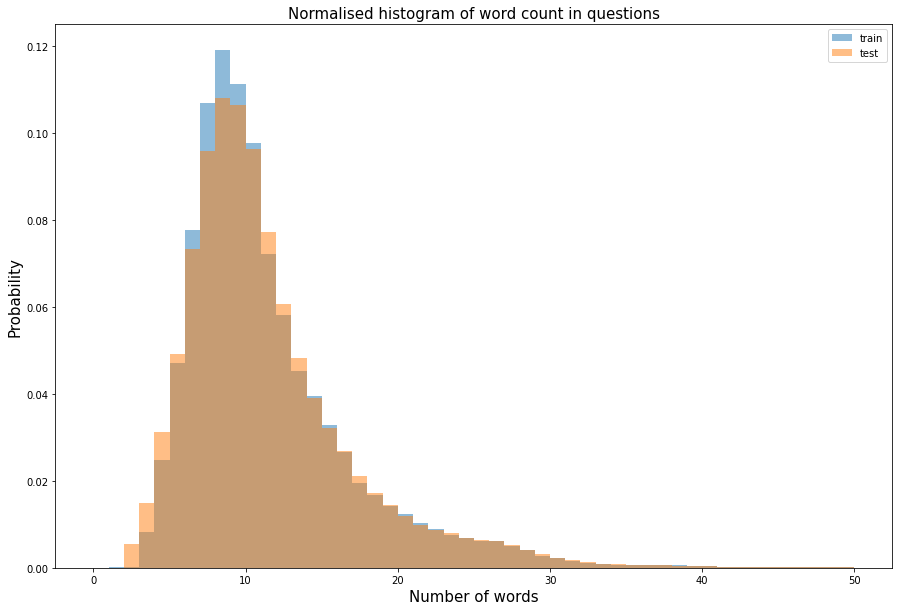

mean-train 11.06 mean-test11.02 std-train 5.89 std-test 5.84 max-train 237.00 max-test 238.00


In [ ]:
dist_train = train_qs.apply(lambda x: len(x.split(' ')))
dist_test = test_qs.apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(15,10))
plt.hist(dist_train, bins=50, range=[0, 50], color=pal[0], density=True, alpha=0.5, label='train')
plt.hist(dist_test, bins=50, range=[0, 50], color=pal[1], density=True, alpha=0.5, label='test')
plt.title('Normalised histogram of word count in questions', fontsize=15)
plt.legend()
plt.xlabel("Number of words", fontdict={'fontsize':15})
plt.ylabel("Probability", fontdict={'fontsize':15})
plt.show()

print('mean-train {:.2f} mean-test{:.2f} std-train {:.2f} std-test {:.2f} max-train {:.2f} max-test {:.2f}'.format(dist_train.mean(),
                                                                                                                   dist_test.mean(),
                                                                                                                   dist_train.std(),
                                                                                                                   dist_test.std(),
                                                                                                                   dist_train.max(),
                                                                                                                   dist_test.max()))

Character analysis와 거의 비슷한 분포를 보여준다.

## Word Cloud

In [ ]:
from wordcloud import WordCloud

(-0.5, 1439.5, 999.5, -0.5)

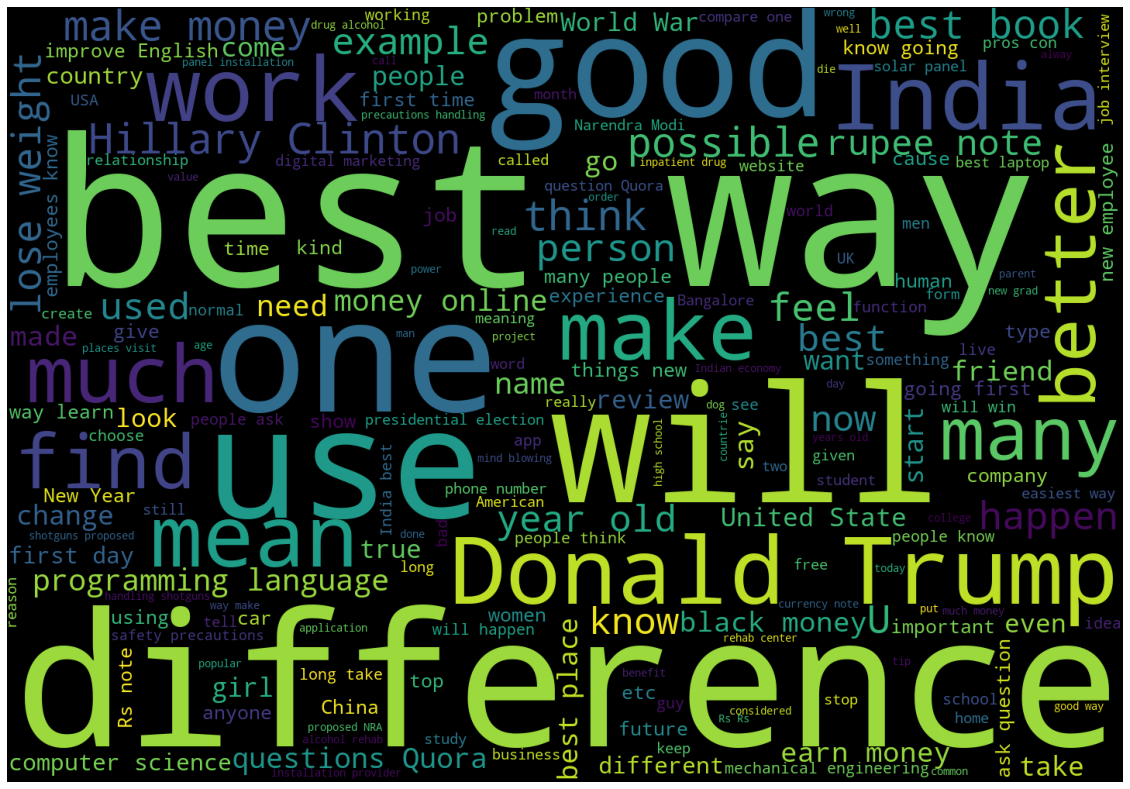

In [ ]:
cloud = WordCloud(width=1440, height=1000).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(20,15))
plt.imshow(cloud)
plt.axis('off')

## Semantic Analysis

In [ ]:
qmarks = np.mean(train_qs.apply(lambda x: '?' in x))
math = np.mean(train_qs.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_qs.apply(lambda x: '.' in x))
capital_first = np.mean(train_qs.apply(lambda x: x[0].isupper()))
capitals = np.mean(train_qs.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_qs.apply(lambda x: max([y.isdigit() for y in x])))

print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
print('Questions with [math] tags: {:.2f}%'.format(math * 100))
print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
print('Questions with capitalised first letters: {:.2f}%'.format(capital_first *100))
print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
print('Questions with numbers: {:.2f}%'.format(numbers * 100))

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%


대부분의 문장은 물음표로 끝나면서 대문자로 시작하고 대부분의 문장에서 [math]tag가 안 쓰인다.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = nltk.corpus.stopwords
stops = set(stopwords.words("english"))

In [ ]:
def word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row[3]).lower().split():
        if word not in stops:
            q1words[word] = 1
    for word in str(row[4]).lower().split():
        if word not in stops:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    shared_words_in_q1 = [w for w in q1words.keys() if w in q2words]
    shared_words_in_q2 = [w for w in q2words.keys() if w in q1words]
    R = (len(shared_words_in_q1) + len(shared_words_in_q2))/(len(q1words) + len(q2words))
    return R

In [ ]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


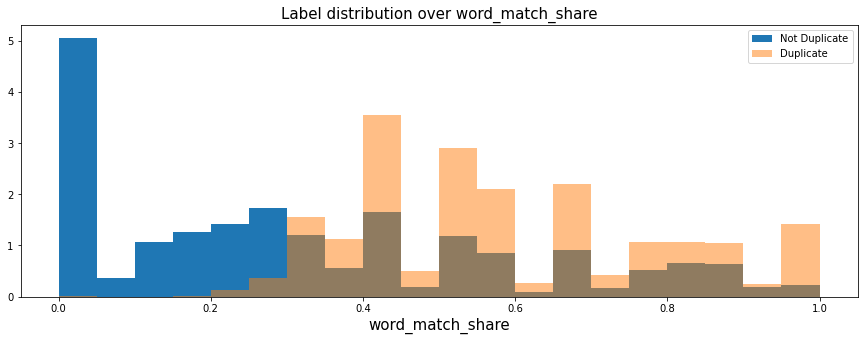

In [ ]:
plt.figure(figsize=(15,5))
train_word_match = train_df.apply(word_match_share, axis=1, raw=True)
plt.hist(train_word_match[train_df['is_duplicate'] == 0], bins=20, density=True, label='Not Duplicate')
plt.hist(train_word_match[train_df['is_duplicate'] == 1], bins=20, density=True, alpha=0.5, label='Duplicate')
plt.legend()
plt.title('Label distribution over word_match_share', fontdict={'fontsize':15})
plt.xlabel('word_match_share', fontdict={'fontsize':15})
plt.show()

확실히 같은 의미를 가진 질문은 같은 단어를 공유하는 경향이 있다.

In [ ]:
from collections import Counter

def get_weight(count, eps=10000, min_count=2):
    if count < min_count:
        return 0
    else:
        return 1 / (count + eps)

eps     = 5000
words   = (" ".join(train_qs)).lower().split()
counts  = Counter(words)
weights = {word: get_weight(count) for word, count in counts.items()}

In [ ]:
print('Most common words and weights: \n')
print(sorted(weights.items(), key=lambda x: x[1] if x[1] > 0 else 9999)[:10])
print('\n Least common words and weights: ')
print(sorted(weights.items(), key=lambda x: x[1], reverse=True)[:10])

Most common words and weights: 

[('the', 2.5891040146646852e-06), ('what', 3.115623919267953e-06), ('is', 3.5861702928825277e-06), ('how', 4.366449945201053e-06), ('i', 4.4805878531263305e-06), ('a', 4.540645588989843e-06), ('to', 4.671434644293609e-06), ('in', 4.884625153865692e-06), ('of', 5.920242493132519e-06), ('do', 6.070908207867897e-06)]

 Least common words and weights: 
[('シ', 9.998000399920016e-05), ('し?', 9.998000399920016e-05), ('19-year-old.', 9.998000399920016e-05), ('1-855-425-3768', 9.998000399920016e-05), ('confederates', 9.998000399920016e-05), ('asahi', 9.998000399920016e-05), ('fab', 9.998000399920016e-05), ('109?', 9.998000399920016e-05), ('samrudi', 9.998000399920016e-05), ('fulfill?', 9.998000399920016e-05)]


In [ ]:
def tfidf_word_match_share(row):
    q1words = {}
    q2words = {}
    for word in str(row[3]).lower().split():
        if word not in words:
            q1words[word] = 1
    for word in str(row[4]).lower().split():
        if word not in words:
            q2words[word] = 1
    if len(q1words) == 0 or len(q2words) == 0:
        return 0
    shared_weights = [weights.get(w,0) for w in q1words.keys() if w in q2words] + [weights.get(w,0) for w in q2words.keys() if w in q1words]
    total_weights  = [weights.get(w,0) for w in q1words] + [weights.get(w,0) for w in q2words]
    R = np.sum(shared_weights) / np.sum(total_weights)
    return R

In [ ]:
plt.figure(figsize=(15, 5))
tfidf_train_word_match = train_df.apply(tfidf_word_match_share, axis=1, raw=True)
plt.hist(tfidf_train_word_match[train_df['is_duplicate'] == 0].fillna(0),
         bins=20,
         density=True,
         label='Not Duplicate')
plt.hist(tfidf_train_word_match[train_df['is_duplicate'] == 1].fillna(0),
         bins = 20,
         density=True,
         alpha=0.5,
         label='Duplicate')
plt.legend()
plt.title('Label distribution over tfidf_word_match_share', fontdict={'fontsize':15})
plt.xlabel('word_match_share', fontdict={'fontsize':15})
plt.show()

# Word Embeding & Downstreaming

## Tf-idf

### Without Tokenizing

In [ ]:
def pair_to_sequence(data):
    return list(data["question1"]) + list(data["question2"])

In [ ]:
import nltk
from nltk.tokenize import TreebankWordTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
nltk.download('punkt')
tokenizer = TreebankWordTokenizer

def Vectorizer(vectorizer, sentences):
    vec = vectorizer.transform(sentences)
    print(f"Shape of whole sentences after TF-IDF vectorizer: {vec.shape}")
    length = int(len(sentences)/2)
    vec1 = vec[:length]
    vec2 = vec[length:]
    print(f"Shape of TF-IDF vectors for sentences1 : {vec1.shape}\nShape of TF-IDF vectors for sentences2: {vec2.shape}")
    return vec1, vec2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
train_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
X = train_df.drop("is_duplicate", axis=1)
y = train_df.is_duplicate

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

vectorizer = TfidfVectorizer()
train_sentences = pair_to_sequence(X_train)
vectorizer.fit(train_sentences)
val_sentences = pair_to_sequence(X_val)
vectorizer.fit(val_sentences)
train_vec1, train_vec2 = Vectorizer(vectorizer, train_sentences)
val_vec1, val_vec2 = Vectorizer(vectorizer, val_sentences)

(323432, 5) (80858, 5) (323432,) (80858,)
Shape of whole sentences after TF-IDF vectorizer: (646864, 41757)
Shape of TF-IDF vectors for sentences1 : (323432, 41757)
Shape of TF-IDF vectors for sentences2: (323432, 41757)
Shape of whole sentences after TF-IDF vectorizer: (161716, 41757)
Shape of TF-IDF vectors for sentences1 : (80858, 41757)
Shape of TF-IDF vectors for sentences2: (80858, 41757)


In [ ]:
from sklearn.metrics.pairwise import paired_cosine_distances

train_dists = paired_cosine_distances(train_vec1, train_vec2)
val_dists = paired_cosine_distances(val_vec1, val_vec2)
print(train_dists.shape, val_dists.shape)

(323432,) (80858,)


In [ ]:
train_df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:
def distance_to_label(distances, threshold=0.5):
    preds = np.ones(distances.shape[0])
    preds[distances<threshold] = 0
    return preds

In [ ]:
threshold = 0.5
train_preds = distance_to_label(train_dists, threshold)
val_preds = distance_to_label(val_dists, threshold)

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y_train, train_preds)
val_acc = accuracy_score(y_val, val_preds)
print(f"Accuracy for training: {train_acc:.4f} and for validation: {val_acc: .4f}")

Accuracy for training: 0.3473 and for validation:  0.3397


In [ ]:
from sklearn.metrics import f1_score

train_f1 = f1_score(y_train, train_preds)
val_f1 = f1_score(y_val, val_preds)
print(f"F1-score for training: {train_f1: .4f} and for validation {val_f1: .4f}")

F1-score for training:  0.2416 and for validation  0.2443


In [ ]:
def find_optimal_threshold(y_true, y_pred, step=0.001):
    thresholds = np.arange(0.0, 1.0, step)
    fscore = np.zeros(shape=len(thresholds))
    print(f"Total {len(thresholds)} step between 0 to 1 for each {step}")

    for index, threshold in enumerate(thresholds):
        y_pred_prob = (y_pred > threshold).astype('int')
        fscore[index] = f1_score(y_true, y_pred_prob)

    index = np.argmax(fscore)
    thresholdOpt = round(thresholds[index], ndigits=4)
    fscoreOpt = round(fscore[index], ndigits=4)
    print("Best Threshold {} with F-Score {}".format(thresholdOpt, fscoreOpt))

    df_threshold_tuning = pd.DataFrame({'F-score':fscore,
                                        'Threshold': thresholds})
    return thresholdOpt, df_threshold_tuning

In [ ]:
step = 0.001
opt_threshold, train_threshold_df = find_optimal_threshold(y_train, train_dists, step)

Total 1000 step between 0 to 1 for each 0.001
Best Threshold 0.0 with F-Score 0.5346


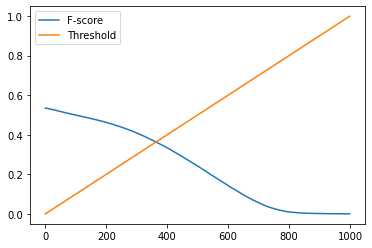

In [ ]:
train_threshold_df.plot()

### After Tokenizing

In [ ]:
corpus[:4]

['What is the step by step guide to invest in share market in india?',
 'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
 'How can I increase the speed of my internet connection while using a VPN?',
 'Why am I mentally very lonely? How can I solve it?']

In [ ]:
def text_preprocessing(text, tokenizer):
    text = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]", "", text)

    tokens = tokenizer().tokenize(text)
    
    stopwords = nltk.corpus.stopwords
    SW = set(stopwords.words("english"))

    result = [token for token in tokens if token not in SW]

    return result

In [ ]:
df = train_df.dropna()

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
X = df.drop("is_duplicate", axis=1)
y = df.is_duplicate

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

vectorizer = TfidfVectorizer()
train_sentences = pair_to_sequence(X_train)
vectorizer.fit(train_sentences)
val_sentences = pair_to_sequence(X_val)
vectorizer.fit(val_sentences)
train_vec1, train_vec2 = Vectorizer(vectorizer, train_sentences)
val_vec1, val_vec2 = Vectorizer(vectorizer, val_sentences)

(323429, 5) (80858, 5) (323429,) (80858,)
Shape of whole sentences after TF-IDF vectorizer: (646858, 41899)
Shape of TF-IDF vectors for sentences1 : (323429, 41899)
Shape of TF-IDF vectors for sentences2: (323429, 41899)
Shape of whole sentences after TF-IDF vectorizer: (161716, 41899)
Shape of TF-IDF vectors for sentences1 : (80858, 41899)
Shape of TF-IDF vectors for sentences2: (80858, 41899)


In [ ]:
train_dists = paired_cosine_distances(train_vec1, train_vec2)
val_dists = paired_cosine_distances(val_vec1, val_vec2)
print(train_dists.shape, val_dists.shape)

(323429,) (80858,)


In [ ]:
threshold = 0.5

train_preds = distance_to_label(train_dists, threshold)
val_preds = distance_to_label(val_dists, threshold)

In [ ]:
train_acc = accuracy_score(y_train, train_preds)
val_acc = accuracy_score(y_val, val_preds)
print(f"Accuracy for training: {train_acc:.4f} and for validation: {val_acc: .4f}")

Accuracy for training: 0.3481 and for validation:  0.3372


In [ ]:
train_f1 = f1_score(y_train, train_preds)
val_f1 = f1_score(y_val, val_preds)
print(f"Accuracy for training: {train_acc:.4f} and for validation: {val_acc:.4f}")

Accuracy for training: 0.3481 and for validation: 0.3372


In [ ]:
step = 0.001
opt_threshold, train_threshold_df = find_optimal_threshold(y_train, train_dists, step)

Total 1000 step between 0 to 1 for each 0.001
Best Threshold 0.0 with F-Score 0.5353


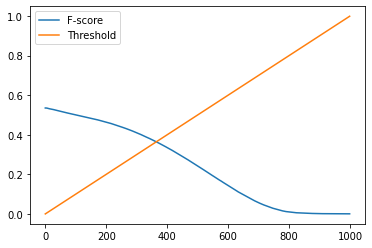

In [ ]:
train_threshold_df.plot()

In [ ]:
test = pd.read_csv("test.csv")
test.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


In [ ]:
def text_preprocessing(text, tokenizer):
    text = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]", "", text)

    tokens = tokenizer().tokenize(text)
    
    stopwords = nltk.corpus.stopwords
    SW = set(stopwords.words("english"))

    result = [token for token in tokens if token not in SW]

    return result

In [ ]:
test['question1'].fillna(method='ffill', inplace=True)
test['question2'].fillna(method='ffill', inplace=True)
test.isnull().sum()

test_id      0
question1    0
question2    0
dtype: int64

In [ ]:
X_test = test.drop("test_id", axis=1)
vectorizer = TfidfVectorizer()
test_sentences = pair_to_sequence(X_test)
vectorizer.fit(test_sentences)
test_vec1, test_vec2 = Vectorizer(vectorizer, test_sentences)

Shape of whole sentences after TF-IDF vectorizer: (4691592, 91323)
Shape of TF-IDF vectors for sentences1 : (2345796, 91323)
Shape of TF-IDF vectors for sentences2: (2345796, 91323)


In [ ]:
def distance_to_label(distances, threshold=0.5):
    preds = np.ones(distances.shape[0])
    preds[distances<threshold] = 0
    return preds

In [ ]:
from sklearn.metrics.pairwise import paired_cosine_distances

test_dists = paired_cosine_distances(test_vec1, test_vec2)
print(test_dists.shape)

(2345796,)


In [ ]:
threshold = 0.5
test_preds = distance_to_label(test_dists, threshold)

In [ ]:
y_pred_prob = (test_preds > threshold).astype('int')
y_pred_prob

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
submission = test.drop(["question1", "question2"],axis=1)
submission["is_duplicate"] = y_pred_prob
submission

,test_id,is_duplicate
0,0,1
1,1,0
2,2,0
3,3,1
4,4,1
...,...,...
2345791,2345791,1
2345792,2345792,1
2345793,2345793,1
2345794,2345794,0


## Word2Vec

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.tokenize import TreebankWordTokenizer
nltk.download('stopwords')
from gensim.models import FastText

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def text_preprocessing(text, tokenizer):
    text = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]", "", text)

    tokens = tokenizer().tokenize(text)
    
    stopwords = nltk.corpus.stopwords
    SW = set(stopwords.words("english"))

    result = [token for token in tokens if token not in SW]

    return result

In [ ]:
def text_preprocessing(text, tokenizer):
    text = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]", "", text)
    
    shortword = re.compile(r'\W*\b\w{1,2}\b')
    text = shortword.sub('', text)

    tokens = tokenizer().tokenize(text)
    
    stopwords = nltk.corpus.stopwords
    SW = set(stopwords.words("english"))

    result = [token for token in tokens if token not in SW]

    return result

In [ ]:
df = train_df.dropna()
train = pair_to_sequence(df)

In [ ]:
tokenizer = TreebankWordTokenizer

corpus = [text_preprocessing(question, tokenizer) for question in train]
corpus[:4]

[['What', 'step', 'step', 'guide', 'invest', 'share', 'market', 'india'],
 ['What', 'story', 'Kohinoor', 'KohiNoor', 'Diamond'],
 ['How', 'I', 'increase', 'speed', 'internet', 'connection', 'using', 'VPN'],
 ['Why', 'I', 'mentally', 'lonely', 'How', 'I', 'solve']]

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=corpus,
                 size=50,
                 window=7,
                 iter=100,
                 workers=4,
                 min_count=2,
                 sg=1)
model.save("w2v_model_1")

In [ ]:
model.wv.most_similar("internet")

[('Internet', 0.9109184741973877),
 ('connectionn', 0.7918076515197754),
 ('democratization', 0.7861465811729431),
 ('WiFi', 0.737576425075531),
 ('roku', 0.7346044182777405),
 ('wifi', 0.7271363735198975),
 ('100Mbps', 0.7213419675827026),
 ('GBPS', 0.719799816608429),
 ('browsing', 0.7161440849304199),
 ('4Gmodem', 0.7132695913314819)]

## FastText

In [ ]:
model2 = FastText(sentences=corpus,
                 size=50,
                 window=7,
                 iter=100,
                 min_count=2,
                 workers=4,
                 sg=1)
model2.save("fasttext_model_2")

In [ ]:
model2.wv.most_similar("internet")

[('Internet', 0.9079415798187256),
 ('connectionn', 0.7878307700157166),
 ('Betternet', 0.7773803472518921),
 ('browsing', 0.7495862245559692),
 ('100Mbps', 0.7405564188957214),
 ('WiFi', 0.726482093334198),
 ('Morrocco', 0.7254295349121094),
 ('GBPS', 0.7232824563980103),
 ('4Gmodem', 0.7206403017044067),
 ('wifi', 0.7174687385559082)]